# Prepare and load dataset

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load data Test

In [3]:
x_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets/Training/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n,(130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n,(130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Training/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 2)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(3)




In [4]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Prepare and load data Test

In [5]:
x_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets/Testing/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Testing/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 2)




for img in glob.glob("/content/drive/MyDrive/datasets/Testing/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 3)

# Create the base model from the pre-trained model Xception

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

                                            

In [7]:
base_model = Xception(include_top=False,weights='imagenet',input_shape=(x_train[0].shape))

In [8]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 64, 64, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [9]:
conv_model = Model(inputs=base_model.input,
                   outputs=base_model.get_layer('block14_sepconv2_act').output)

In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
train_ds = preprocess_input(x_train)
valid_ds = preprocess_input(x_valid) 
test_ds = preprocess_input(x_test)

In [12]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(64, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

In [13]:
model = Sequential([
    conv_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

# fine-tuning

In [14]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [15]:
conv_model.trainable = True
set_trainable = False
for layer in conv_model.layers:
  if layer.name == 'block13_pool':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 64, 64, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

In [16]:
print_layer_trainable()

False:	input_1
False:	block1_conv1
False:	block1_conv1_bn
False:	block1_conv1_act
False:	block1_conv2
False:	block1_conv2_bn
False:	block1_conv2_act
False:	block2_sepconv1
False:	block2_sepconv1_bn
False:	block2_sepconv2_act
False:	block2_sepconv2
False:	block2_sepconv2_bn
False:	conv2d
False:	block2_pool
False:	batch_normalization
False:	add
False:	block3_sepconv1_act
False:	block3_sepconv1
False:	block3_sepconv1_bn
False:	block3_sepconv2_act
False:	block3_sepconv2
False:	block3_sepconv2_bn
False:	conv2d_1
False:	block3_pool
False:	batch_normalization_1
False:	add_1
False:	block4_sepconv1_act
False:	block4_sepconv1
False:	block4_sepconv1_bn
False:	block4_sepconv2_act
False:	block4_sepconv2
False:	block4_sepconv2_bn
False:	conv2d_2
False:	block4_pool
False:	batch_normalization_2
False:	add_2
False:	block5_sepconv1_act
False:	block5_sepconv1
False:	block5_sepconv1_bn
False:	block5_sepconv2_act
False:	block5_sepconv2
False:	block5_sepconv2_bn
False:	block5_sepconv3_act
False:	block5_sepc

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4, 4, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 25,064,428
Trainable params: 8,953,796
Non-trainable params: 16,110,632
_________________________________________________________________


# Train the model

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, validation_data= (x_valid,y_valid),  
                              batch_size=32, epochs=50,
                              verbose=1,callbacks=[keras.callbacks.EarlyStopping
                               (monitor="val_loss",
                                patience=10,verbose=1,
                                restore_best_weights=True),
                               ])


Epoch 1/50
77/77 [==============================] - 11s 79ms/step - loss: 1.0807 - accuracy: 0.5576 - val_loss: 2.7704 - val_accuracy: 0.2019
Epoch 2/50
77/77 [==============================] - 4s 56ms/step - loss: 0.6269 - accuracy: 0.7495 - val_loss: 1.0233 - val_accuracy: 0.6079
Epoch 3/50
77/77 [==============================] - 4s 56ms/step - loss: 0.4234 - accuracy: 0.8356 - val_loss: 0.6941 - val_accuracy: 0.7193
Epoch 4/50
77/77 [==============================] - 4s 57ms/step - loss: 0.2768 - accuracy: 0.9053 - val_loss: 0.5006 - val_accuracy: 0.8074
Epoch 5/50
77/77 [==============================] - 4s 56ms/step - loss: 0.1695 - accuracy: 0.9438 - val_loss: 0.4445 - val_accuracy: 0.8492
Epoch 6/50
77/77 [==============================] - 4s 56ms/step - loss: 0.1111 - accuracy: 0.9635 - val_loss: 0.5286 - val_accuracy: 0.8074
Epoch 7/50
77/77 [==============================] - 4s 56ms/step - loss: 0.0767 - accuracy: 0.9770 - val_loss: 0.5350 - val_accuracy: 0.8353
Epoch 8/50
7

# plot the loss and accuracy of the model

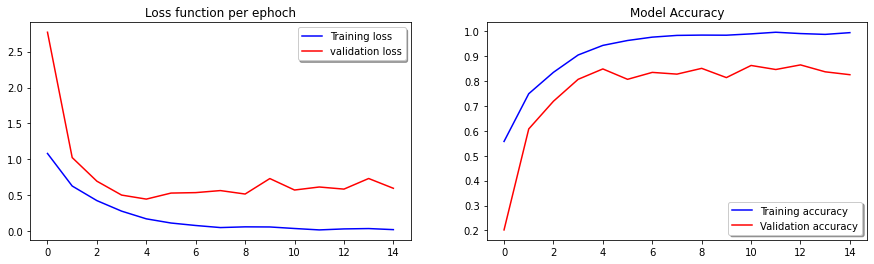

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Loss function per ephoch')
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Model Accuracy')
legend = ax[1].legend(loc='best', shadow=True)

# train & test loss and accuracy

In [20]:
train_loss, train_acc= model.evaluate(x_train,y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)

77/77 [==============================] - 3s 43ms/step - loss: 0.0673 - accuracy: 0.9844
train acc: 0.9844198226928711
train loss: 0.06730712205171585


In [21]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)

13/13 [==============================] - 1s 74ms/step - loss: 2.3758 - accuracy: 0.6954
test acc: 0.6954314708709717
test loss: 2.375807762145996
